1. Попробуйте улучшить работу нейронной сети (разобранную на уроке), обучавшейся на датасет Fashion-MNIST. Напишите в комментариях к уроку, какого результата вы добились от нейросети и что помогло улучшить её точность
2. Поработайте с документацией TensorFlow 2. Попробуйте найти полезные команды TensorFlow, неразобранные на уроке
3. Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews.
Напишите в комментариях к уроку, какого результата вы добились от нейросети и что
помогло улучшить её точность

In [1]:
import tensorflow as tf
tf.random.set_seed(5)
from tensorflow import keras
from tensorflow.keras import callbacks
from tensorflow.keras.utils import to_categorical, to_ordinal
from tensorflow.keras.models import load_model
#Helper libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import keras_tuner as kt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, accuracy_score

print(tf.__version__)

2023-09-18 12:57:51.515652: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-18 12:57:51.542804: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-18 12:57:51.543586: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-18 12:57:52.284815: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.13.0


In [2]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = (train_images / 255)
test_images = (test_images / 255)

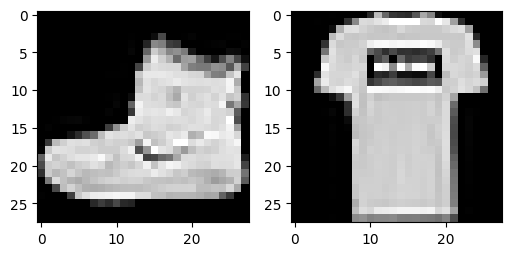

In [3]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(train_images[0], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(train_images[1], cmap='gray')

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='input'),
    keras.layers.Dense(256, activation='relu', name='hiden_one'),
    keras.layers.Dense(256, activation='relu', name='hiden_two'),
    keras.layers.Dense(128, activation='relu', name='hiden_three'),
    keras.layers.Dense(64, activation='tanh', name='hiden_four'),
    keras.layers.Dense(64, activation='relu', name='hiden_five'),
    keras.layers.Dense(10, name='output')
])
config = model.get_config()
model.save_weights('fashion_weights.h5')

313/313 - 0s - loss: 0.3478 - accuracy: 0.8984 - 345ms/epoch - 1ms/step

Test accuracy: 0.8984000086784363
313/313 [==============================] - 0s 964us/step


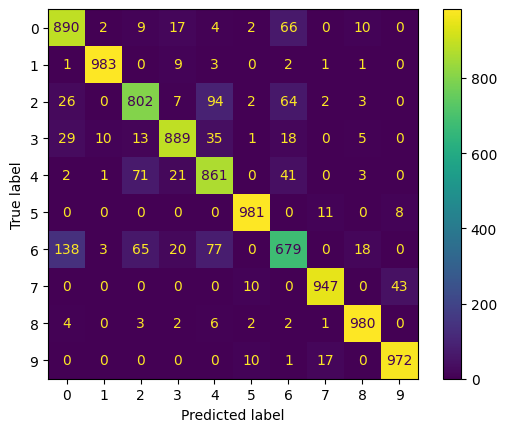

In [11]:
model = model.from_config(config)
model.load_weights('fashion_weights.h5')


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(train_images, train_labels, batch_size = 250, epochs=25, verbose=0)
  # model.fit(train_images, train_labels, batch_size = 250, epochs=el, verbose=0, validation_data=(test_images, test_labels))
  # model.fit(train_images, train_labels, batch_size = 10, epochs=10, verbose=0, validation_data=(test_images, test_labels), callbacks=[reduce_lr])
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
  # Получим предсказания
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
y_pred = np.argmax(predictions, axis=1)
# Посмотрим на результаты
ConfusionMatrixDisplay.from_predictions(test_labels, y_pred)

In [7]:
def recall_precision(y_true, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
  precision = precision_score(y_true, y_pred, labels=labels, average=None)
  recall = recall_score(y_true, y_pred, labels=labels, average=None)
  for i, el in enumerate(zip(precision, recall)):
    print(f'Класс - {i}, точность - {el[0]:.3f}, полнота - {el[1]:.3f}')

In [8]:
recall_precision(test_labels, y_pred)

Класс - 0, точность - 0.806, полнота - 0.894
Класс - 1, точность - 0.992, полнота - 0.986
Класс - 2, точность - 0.857, полнота - 0.760
Класс - 3, точность - 0.908, полнота - 0.917
Класс - 4, точность - 0.807, полнота - 0.842
Класс - 5, точность - 0.993, полнота - 0.927
Класс - 6, точность - 0.744, полнота - 0.692
Класс - 7, точность - 0.946, полнота - 0.961
Класс - 8, точность - 0.958, полнота - 0.981
Класс - 9, точность - 0.933, полнота - 0.982


In [12]:
# Создаем словарь который будет содержать модель сети и параметры для обучения
models = dict()
models[0] = [keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='input'),
    keras.layers.Dense(256, activation='relu', name='hiden_one'),
    keras.layers.Dense(256, activation='relu', name='hiden_two'),
    keras.layers.Dense(128, activation='relu', name='hiden_three'),
    keras.layers.Dense(64, activation='tanh', name='hiden_four'),
    keras.layers.Dense(64, activation='relu', name='hiden_five'),
    keras.layers.Dense(10, name='output')
]), tf.keras.optimizers.Adam(learning_rate=0.001), 250]
models[1] = [keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='input'),
    keras.layers.Dense(256, activation='relu', name='hiden_one'),
    keras.layers.Dense(256, activation='relu', name='hiden_two'),
    keras.layers.Dense(128, activation='gelu', name='hiden_three'),
    keras.layers.Dense(64, activation='sigmoid', name='hiden_four'),
    keras.layers.Dense(64, activation='selu', name='hiden_five'),
    keras.layers.Dense(10, name='output')]), tf.keras.optimizers.AdamW(learning_rate=0.001), 450]
# Список для сохранения результатов
result = list()
# Формируем сеть.
for key, param in models.items():
  # Загружаем параметры
  model, opt, batch = param[0], param[1], param[2]
  # Загружаем входные веса, чтобы хоть как-то "уравнять" результаты работы
  model.load_weights('fashion_weights.h5')
  model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  model.fit(train_images, train_labels, batch_size=batch, epochs=25, verbose=0)
  # Получаем предварительную метрику
  test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
  print('\nTest accuracy:', test_acc)
  probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
  # Сохраняем массив с вероятностями
  result.append(probability_model.predict(test_images))
# Получаем финишное предсказание суммируя два массива с вероятностями
y_pred = np.argmax(sum(result), axis=1)
# Окончательная метрика качества
print(accuracy_score(test_labels, y_pred))
# Распределение предсказаний по классам
print(recall_precision(test_labels, y_pred))
ConfusionMatrixDisplay.from_predictions(test_labels, y_pred)

313/313 - 0s - loss: 0.3478 - accuracy: 0.8984 - 320ms/epoch - 1ms/step

Test accuracy: 0.8984000086784363
313/313 [==============================] - 0s 819us/step


Добавив скрытый слой с 256 нейронами, удалось добиться точности 0.9028

In [ ]:
import keras_tuner as kt

In [ ]:
def model_builder(hp):
  keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28), name='input'),
  keras.layers.Dense(hp.Choice('units', [256, 512]), activation='relu', name='hiden_one'),
  keras.layers.Dense(256, activation='relu', name='hiden_two'),
  keras.layers.Dense(128, activation='gelu', name='hiden_three'),
  keras.layers.Dense(64, activation='sigmoid', name='hiden_four'),
  keras.layers.Dense(64, activation='selu', name='hiden_five'),
  keras.layers.Dense(10, name='output')])

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     overwrite=True,
                     directory='project')

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
tuner.search(train_images, train_labels, epochs=25, validation_split=0.2, callbacks=[stop_early])
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(f' layer is {best_hps.get("units")}')

Trial 2 Complete [00h 00m 18s]
val_accuracy: 0.906499981880188

Best val_accuracy So Far: 0.906499981880188
Total elapsed time: 00h 00m 39s
INFO:tensorflow:Oracle triggered exit
 layer is 256


IMDB reviews

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, preprocessing
import tensorflow_datasets as tfds

max_len = 200
n_words = 10000
dim_embedding = 256
EPOCHS = 20
BATCH_SIZE = 500

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.imdb.load_data(num_words=n_words)
X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)
X_test = preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)

In [ ]:
model = models.Sequential()
model.add(layers.Embedding(n_words, dim_embedding, input_length=max_len))
model.add(layers.Dropout(0.3))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
score = model.fit(X_train, y_train, 
                  epochs = EPOCHS,
                  batch_size = BATCH_SIZE,
                  validation_data = (X_test, y_test)
                  )
score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
50/50 [==============================] - 14s 266ms/step - loss: 0.6762 - accuracy: 0.6014 - val_loss: 0.6437 - val_accuracy: 0.7312
Epoch 2/20
50/50 [==============================] - 13s 256ms/step - loss: 0.4886 - accuracy: 0.8238 - val_loss: 0.3842 - val_accuracy: 0.8544
Epoch 3/20
50/50 [==============================] - 13s 257ms/step - loss: 0.2931 - accuracy: 0.8819 - val_loss: 0.3091 - val_accuracy: 0.8748
Epoch 4/20
50/50 [==============================] - 13s 255ms/step - loss: 0.2252 - accuracy: 0.9115 - val_loss: 0.2909 - val_accuracy: 0.8790
Epoch 5/20
50/50 [==============================] - 13s 259ms/step - loss: 0.1803 - accuracy: 0.9350 - val_loss: 0.2935 - val_accuracy: 0.8734
Epoch 6/20
50/50 [==============================] - 13s 259ms/step - loss: 0.1432 - accuracy: 0.9505 - val_loss: 0.2942 - val_accuracy: 0.8736
Epoch 7/20
50/50 [==============================] - 13s 259ms/step - loss: 0.1106 - accuracy: 0.9657 - val_loss: 0.3004 - val_accuracy: 0.8719